# Optimización local vs global

## Definiciones

**Optimización global de un objetivo:** $\;$ consiste en hallar un **óptimo global**, esto es, una solución no mejorable por ninguna otra

**Optimización local de un objetivo:** $\;$ más modesta que la global, consiste en hallar un **óptimo local**, es decir, un solución no mejorable por ninguna otra en un entorno local

**Mínimo local (plano):** $\;\,\boldsymbol{\theta}^*\;$ tal que $\;\exists\,\delta>0,\quad\forall\,\boldsymbol{\theta}\in\Theta\,:\,\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad\mathcal{L}(\boldsymbol{\theta}^*)\leq\mathcal{L}(\boldsymbol{\theta})$

**Mínimo local estricto:** $\;\boldsymbol{\theta}^*\;$ tal que $\;\exists\,\delta>0,\quad\forall\,\boldsymbol{\theta}\in\Theta,\,\boldsymbol{\theta}\neq\boldsymbol{\theta}^*\,:\,\lVert\boldsymbol{\theta}-\boldsymbol{\theta}^*\rVert<\delta,\quad\mathcal{L}(\boldsymbol{\theta}^*)<\mathcal{L}(\boldsymbol{\theta})$

## Condiciones de optimalidad local

**Objetivo, gradiente y Hessiana:** $\;$ sea $\mathcal{L}(\boldsymbol{\theta})$ doblemente diferenciable, con gradiente $\,\boldsymbol{g}(\boldsymbol{\theta})=\nabla\mathcal{L}(\boldsymbol{\theta})\,$ y Hessiana $\,\boldsymbol{H}(\boldsymbol{\theta})=\nabla^2\mathcal{L}(\boldsymbol{\theta})$

**Gradiente y Hessiana en $\boldsymbol{\theta}^*\in\mathbb{R}^D$:** $\qquad\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}\quad$ y $\quad\boldsymbol{H}^*=\boldsymbol{H}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}^*}$

**Necesidad de punto estacionario:** $\;\boldsymbol{g}^*=\boldsymbol{0};\;$ si no, $\mathcal{L}(\boldsymbol{\theta}^*)$ puede minorarse a pequeña distancia en la dirección del negativo del gradiente

**Insuficiencia de punto estacionario:** $\;$ $\;\boldsymbol{g}^*=\boldsymbol{0}\;$ también se cumple si $\boldsymbol{\theta}^*$ es máximo local o punto de silla (en 2d)

**Condición suficiente de optimalidad local:** $\,$ si $\,\boldsymbol{g}^*=\boldsymbol{0}\,$ y $\,\boldsymbol{H}^*\,$ es (semi-)definida positiva, $\,\boldsymbol{\theta}^*\,$ es un mínimo local
* $\boldsymbol{H}^*\succeq 0\,$ garantiza que el objetivo no decrece en el entorno del punto, por lo que $\,\boldsymbol{\theta}^*\,$ es mínimo local (plano)
* $\boldsymbol{H}^*\succ 0\,$ garantiza que el objetivo crece en el entorno del punto, por lo que $\,\boldsymbol{\theta}^*\,$ es mínimo local estricto



**Ejemplo:** $\qquad\boldsymbol{x}=(x_1, x_2)^t$ $\qquad\boldsymbol{x}^*=\boldsymbol{0}$ $\qquad\mathcal{L}(\boldsymbol{x})=a_1x_1^2+a_2x_2^2, \quad a_1,a_2\neq 0$
$$\boldsymbol{g}(\boldsymbol{x})=(2a_1x_1, 2a_2x_2)\qquad\boldsymbol{g}^*=\boldsymbol{g}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\boldsymbol{0}$$
$$\mathbf{H}(\boldsymbol{x})=\operatorname{diag}(2a_1, 2a_2)\qquad\mathbf{H}^*=\mathbf{H}(\boldsymbol{x})\rvert_{\boldsymbol{x}^*}=\operatorname{diag}(2a_1, 2a_2)=\begin{cases}\succ 0&\text{si}\;a_1, a_2>0\\%
\prec 0&\text{si}\;a_1, a_2<0\\%
\text{indefinida}&a_1, a_2\,\text{de signo opuesto}\end{cases}$$



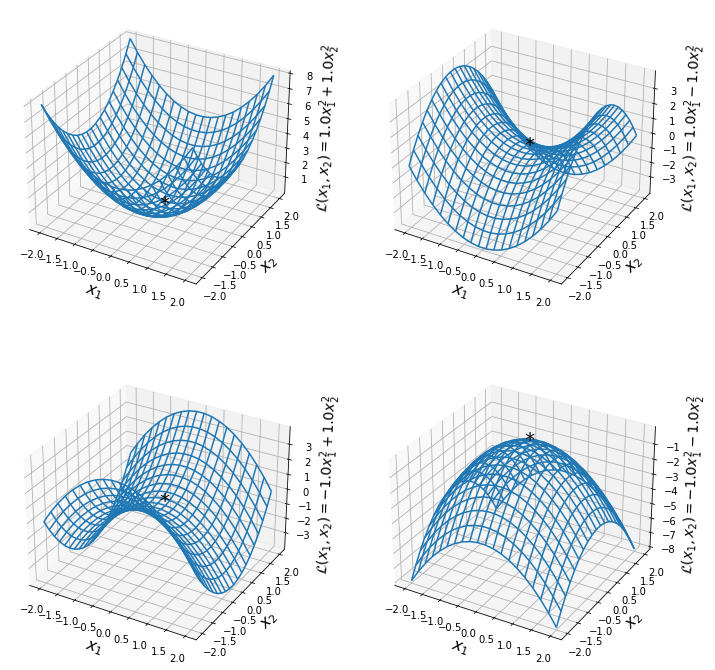

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def L(x1, x2, a=1, b=1):
    return a*x1**2 + b*x2**2
x1, x2 = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
ab = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]]).astype(float)
nrows, ncols, size = 2, 2, 6
fig = plt.figure(figsize=(size * ncols, size * nrows))
fig.tight_layout()
for i, abi in enumerate(ab):
    ax = fig.add_subplot(nrows, ncols, i+1, projection='3d')
    ax.set_xlabel('$x_1$', fontsize=16)
    ax.set_ylabel('$x_2$', fontsize=16)
    zlabel = '${:}x_1^2{:+}x_2^2$'.format(abi[0], abi[1])
    ax.set_zlabel('$\mathcal{L}(x_1,x_2)=$' + zlabel, fontsize=14)
    ax.text(0, 0, 0, '*', fontsize=20)
    ax.plot_wireframe(x1, x2, L(x1, x2, a=abi[0], b=abi[1]))